In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [8]:
veri=pd.read_csv("dataset.csv")
veri.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [9]:
veri.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [10]:
veri.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [11]:
proto=pd.get_dummies(veri["proto"],drop_first=True)
service=pd.get_dummies(veri["service"],drop_first=True)
state=pd.get_dummies(veri["state"],drop_first=True)
attack_cat=pd.get_dummies(veri["attack_cat"],drop_first=True)
veri.drop(["proto","service","state","attack_cat"],axis=1,inplace=True)
objectveri=pd.concat([proto,service,state,attack_cat],axis=1)
yeniveri=veri.join(objectveri)
yeniveri.dtypes

id                  int64
dur               float64
spkts               int64
dpkts               int64
sbytes              int64
                   ...   
Generic             uint8
Normal              uint8
Reconnaissance      uint8
Shellcode           uint8
Worms               uint8
Length: 204, dtype: object

Accurancy 1.0
F-score 1.0
Precision Score 1.0
Recall Score, 1.0
[learning_curve] Training set sizes: [  2319   7004  11689  16375  21060  25746  30431  35117  39802  44487
  49173  53858  58544  63229  67915  72600  77285  81971  86656  91342
  96027 100713 105398 110083 114769 119454 124140 128825 133511 138196
 142881 147567 152252 156938 161623 166309 170994 175679 180365 185050
 189736 194421 199107 203792 208477 213163 217848 222534 227219 231905]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 35.4min finished


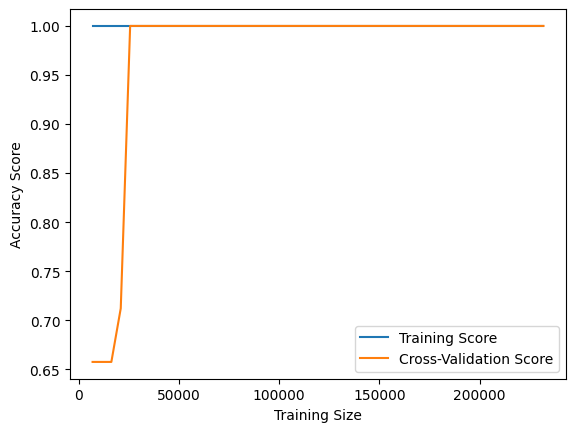

In [15]:
x=yeniveri.drop("label",axis=1)
y=yeniveri["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)
xgb_cls=xgb.XGBClassifier(objective="binary:logistic")
xgb_cls.fit(x_train,y_train)
tahmin=xgb_cls.predict(x_test)
cm=confusion_matrix(y_test,tahmin)
print("Accurancy",accuracy_score(y_test,tahmin))
print("F-score",f1_score(y_test,tahmin))
print("Precision Score",precision_score(y_test,tahmin))
print("Recall Score,",recall_score(y_test,tahmin))
train_sizes,train_scores,test_scores=learning_curve(xgb_cls,x,y,cv=10,scoring="accuracy",n_jobs=-1,train_sizes=np.linspace(0.01,1,50),verbose=1)
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="Cross-Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

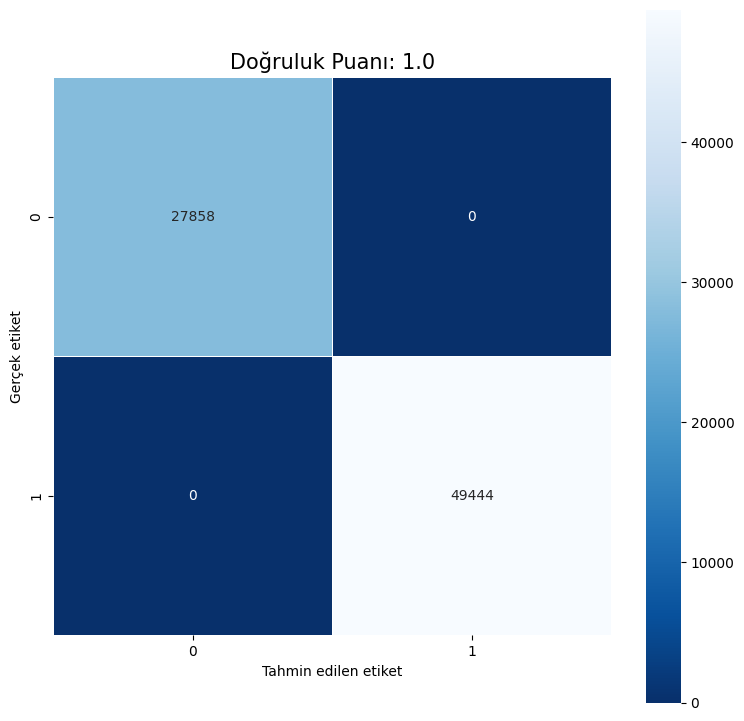

In [7]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Gerçek etiket');
plt.xlabel('Tahmin edilen etiket');
all_sample_title = 'Doğruluk Puanı: {0}'.format(accuracy_score(y_test,tahmin))
plt.title(all_sample_title, size = 15);